## Final Project Submission

Please fill out:
* Student name: Florian Fedrau


## What to do

We are given the King County House Sales dataset and we want to predict the prices for houses.

## Importing Python Libraries needed for the project

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix # data processing, scatter matrix 
import statsmodels.api as sm # Python module that provides classes and functions for the estimation of many different 
#statistical models, as well as for conducting statistical tests, and statistical data exploration
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from mpl_toolkits.basemap import Basemap
sns.set()
%matplotlib inline

## Import the data

In [2]:
df = pd.read_csv('King_County_House_prices_dataset.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

## Understanding the data

In [3]:
f = open("column_names.md", "r")
print(f.read())
f.close()

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the neares

## Cleaning the data

Lets get an overview about our data first.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Sort for nan values

In [5]:
df.isna().sum().sort_values()

id                  0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_basement       0
sqft_above          0
grade               0
sqft_living15       0
condition           0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
price               0
date                0
sqft_lot15          0
view               63
waterfront       2376
yr_renovated     3842
dtype: int64

We see that there are missing values in the columns view, waterfront and yr_renovated. Let's get an better understanding of the columns before we decide what to do with them.

First we take a look at the column waterfront

In [6]:
print("Unique values in waterfront:" + str(df.waterfront.unique()))
print("Mean value of waterfront   :" + str(df.waterfront.mean()))

Unique values in waterfront:[nan  0.  1.]
Mean value of waterfront   :0.007595858696217679


Takeaway, basicly it is an boolean saying if a house has waterfront. We can also see that most of the houses have no waterfront.

We asume that a waterfront is an unique selling point and every houseowner would give us the information if the house has one. So we decide to fill the "nan" with zeros.

In [7]:
df.waterfront.fillna(0, inplace =True)
df.waterfront.unique()

array([0., 1.])

We continue with the next column view

In [8]:
print("Unique values in view : " + str(df.view.unique()))
print("Mean value of view    : " + str(df.view.mean()))
print("Number of Nan for view: " + str(df['view'].isna().sum()))
print("Unique count for view : ")
print(df.groupby('view')['id'].nunique())

Unique values in view : [ 0. nan  3.  4.  2.  1.]
Mean value of view    : 0.23386272870808952
Number of Nan for view: 63
Unique count for view : 
view
0.0    19253
1.0      329
2.0      956
3.0      505
4.0      314
Name: id, dtype: int64


We can see that most of the houses have not been viewed. We have only 63 nan in the column and we can fill them with zeros.

In [9]:
df.view.fillna(0, inplace =True)
df.view.unique()

array([0., 3., 4., 2., 1.])

We continue with the column yr_renovated

In [10]:
print("Unique values in yr_renovated : " + str(df.yr_renovated.unique()))
print("Number of Nan for yr_renovated: " + str(df['yr_renovated'].isna().sum()))
print("Unique count for yr_renovated : ")
print(df.groupby('yr_renovated')['id'].nunique().head())

Unique values in yr_renovated : [   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
Number of Nan for yr_renovated: 3842
Unique count for yr_renovated : 
yr_renovated
0.0       16900
1934.0        1
1940.0        2
1944.0        1
1945.0        3
Name: id, dtype: int64


We asume that a renovation is an uique selling point and the houseowner would mention it. So we can fill the nan with a zero what means no renovation has taken place.

In [11]:
df.yr_renovated.fillna(0, inplace = True)
df['yr_renovated'].isna().sum()

0

So lets take a look at our data:

In [12]:
df.isna().sum().sort_values()

id               0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
grade            0
sqft_living15    0
condition        0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
date             0
view             0
sqft_lot15       0
dtype: int64

We filled all of the missing data.

To be able to work with our data we want to have numeric values in our data. Lets figure out in what format our data is.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


So the columns date and sqft_basement are objects. We want to change that. First we take a look at sqft_basement. I would expect an numeric value. Lets explore sqft_basement

In [14]:
print(df.groupby('sqft_basement')['id'].nunique())

sqft_basement
0.0       12718
10.0          1
100.0        42
1000.0      146
1008.0        1
1010.0       62
1020.0       51
1024.0        1
1030.0       44
1040.0       54
1050.0       41
1060.0       58
1070.0       51
1080.0       31
1090.0       32
110.0        18
1100.0       78
1110.0       35
1120.0       43
1130.0       30
1135.0        1
1140.0       28
1150.0       26
1160.0       26
1170.0       30
1180.0       28
1190.0       24
120.0        53
1200.0       68
1210.0       18
          ...  
80.0         20
800.0       201
810.0        55
820.0        62
830.0        56
840.0        82
850.0        69
860.0        79
861.0         1
862.0         1
870.0        48
875.0         1
880.0        69
890.0        52
90.0         21
900.0       141
906.0         1
910.0        69
915.0         1
920.0        65
930.0        41
935.0         1
940.0        71
946.0         1
950.0        62
960.0        65
970.0        44
980.0        55
990.0        51
?           454
Name: id, 

We see the unique sqrt_basement values and detect that in 454 rows is a "?". Thats why the datatype of the column is an object. We definetly want to change that. 

So lets try to find some information about the houses with basement, without basement and we don't know about the basement.

In [15]:
df[['sqft_basement','sqft_above','sqft_living']].head()

sqft_basement  sqft_above  sqft_living
0           0.0        1180         1180
1         400.0        2170         2570
2           0.0         770          770
3         910.0        1050         1960
4           0.0        1680         1680

In [16]:
basement = df[['sqft_basement','sqft_above','sqft_living']]
basement['sqft_living-above'] = basement['sqft_living'] - basement['sqft_above']
basement

/Users/flori/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


sqft_basement  sqft_above  sqft_living  sqft_living-above
0               0.0        1180         1180                  0
1             400.0        2170         2570                400
2               0.0         770          770                  0
3             910.0        1050         1960                910
4               0.0        1680         1680                  0
5            1530.0        3890         5420               1530
6                 ?        1715         1715                  0
7               0.0        1060         1060                  0
8             730.0        1050         1780                730
9               0.0        1890         1890                  0
10           1700.0        1860         3560               1700
11            300.0         860         1160                300
12              0.0        1430         1430                  0
13              0.0        1370         1370                  0
14              0.0        1810         1810                  0
15            970.0        1980         2950                970
16              0.0        1890         1890                  0
17              0.0        1600         1600                  0
18                ?        1200         1200                  0
19              0.0        1250         1250                  0
20            760.0         860         1620                760
21            720.0        2330         3050                720
22              0.0        2270         2270                  0
23              0.0        1070         1070                  0
24              0.0        2450         2450                  0
25              0.0        1710         1710                  0
26            700.0        1750         2450                700
27              0.0        1400         1400                  0
28            730.0         790         1520                730
29              0.0        2570         2570                  0
...             ...         ...          ...                ...
21567           0.0         710          710                  0
21568         320.0         940         1260                320
21569           0.0        1870         1870                  0
21570           0.0        1430         1430                  0
21571           0.0        1520         1520                  0
21572         190.0        1020         1210                190
21573           0.0        2540         2540                  0
21574        1800.0        3110         4910               1800
21575           0.0        2770         2770                  0
21576           0.0        1190         1190                  0
21577           0.0        4170         4170                  0
21578           0.0        2500         2500                  0
21579          50.0        1480         1530                 50
21580           0.0        3600         3600                  0
21581             ?        3410         3410                  0
21582           0.0        3118         3118                  0
21583           0.0        3990         3990                  0
21584           0.0        4470         4470                  0
21585           0.0        1425         1425                  0
21586           0.0        1500         1500                  0
21587           0.0        2270         2270                  0
21588           0.0        1490         1490                  0
21589           0.0        2520         2520                  0
21590         910.0        2600         3510                910
21591         130.0        1180         1310                130
21592           0.0        1530         1530                  0
21593           0.0        2310         2310                  0
21594           0.0        1020         1020                  0
21595           0.0        1600         1600                  0
21596           0.0        1020         1020                  0

[21597 rows x 4 columns]

Seems like the sqft_basement is just calculated by subtracting sqft_above from sqft_living

In [17]:
df['sqft_basement'] = basement['sqft_living'] - basement['sqft_above']

So sqft_living is just the sum of sqft_aboce and sqft_basement we can just drop it.

In [18]:
df.drop('sqft_living', axis = 1, inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.3+ MB


Now we have to look at the date column. To be able to work with it we have to change it to an numeriv value.
Therefore we want to seperate between spring, summer, autumn and winter.
We asume that the winter starts at december 1st, spring starts at march 1st, summer starts at june 1st and autumn at september 1st.

In [20]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
dates = []
for i in (range(len(df))):
    if(df['date'][i].month == 12 or df['date'][i].month == 1 or df['date'][i].month == 2):
        dates.append('winter')
    elif(df['date'][i].month == 3 or df['date'][i].month == 4 or df['date'][i].month == 5):
        dates.append('spring')
    elif(df['date'][i].month == 6 or df['date'][i].month == 7 or df['date'][i].month == 8):
        dates.append('summer')
    else:
        dates.append('autumn')

In [22]:
dates_dummies = pd.get_dummies(dates, drop_first=True)
dates_dummies.head()

spring  summer  winter
0       0       0       0
1       0       0       1
2       0       0       1
3       0       0       1
4       0       0       1

We generated our dummy variables. Now we want to join our dummy variables with our dataset

In [23]:
df2 = pd.concat([df, dates_dummies], axis = 1)
df2.head()

id       date     price  bedrooms  bathrooms  sqft_lot  floors  \
0  7129300520 2014-10-13  221900.0         3       1.00      5650     1.0   
1  6414100192 2014-12-09  538000.0         3       2.25      7242     2.0   
2  5631500400 2015-02-25  180000.0         2       1.00     10000     1.0   
3  2487200875 2014-12-09  604000.0         4       3.00      5000     1.0   
4  1954400510 2015-02-18  510000.0         3       2.00      8080     1.0   

   waterfront  view  condition   ...    yr_built  yr_renovated  zipcode  \
0         0.0   0.0          3   ...        1955           0.0    98178   
1         0.0   0.0          3   ...        1951        1991.0    98125   
2         0.0   0.0          3   ...        1933           0.0    98028   
3         0.0   0.0          5   ...        1965           0.0    98136   
4         0.0   0.0          3   ...        1987           0.0    98074   

       lat     long  sqft_living15  sqft_lot15  spring  summer  winter  
0  47.5112 -122.257           1340        5650       0       0       0  
1  47.7210 -122.319           1690        7639       0       0       1  
2  47.7379 -122.233           2720        8062       0       0       1  
3  47.5208 -122.393           1360        5000       0       0       1  
4  47.6168 -122.045           1800        7503       0       0       1  

[5 rows x 23 columns]

Now we want to drop the month and day part of the date, so we just have the year left.

In [24]:
df2['date'] = pd.DatetimeIndex(df2['date']).year 

In [25]:
df2.head()

id  date     price  bedrooms  bathrooms  sqft_lot  floors  \
0  7129300520  2014  221900.0         3       1.00      5650     1.0   
1  6414100192  2014  538000.0         3       2.25      7242     2.0   
2  5631500400  2015  180000.0         2       1.00     10000     1.0   
3  2487200875  2014  604000.0         4       3.00      5000     1.0   
4  1954400510  2015  510000.0         3       2.00      8080     1.0   

   waterfront  view  condition   ...    yr_built  yr_renovated  zipcode  \
0         0.0   0.0          3   ...        1955           0.0    98178   
1         0.0   0.0          3   ...        1951        1991.0    98125   
2         0.0   0.0          3   ...        1933           0.0    98028   
3         0.0   0.0          5   ...        1965           0.0    98136   
4         0.0   0.0          3   ...        1987           0.0    98074   

       lat     long  sqft_living15  sqft_lot15  spring  summer  winter  
0  47.5112 -122.257           1340        5650       0       0       0  
1  47.7210 -122.319           1690        7639       0       0       1  
2  47.7379 -122.233           2720        8062       0       0       1  
3  47.5208 -122.393           1360        5000       0       0       1  
4  47.6168 -122.045           1800        7503       0       0       1  

[5 rows x 23 columns]

Create new column "last_building_phase" include the max of yr_built and yr_renovated

In [26]:
df2["last_building_phase"] = df2[["yr_built", "yr_renovated"]].max(axis=1)

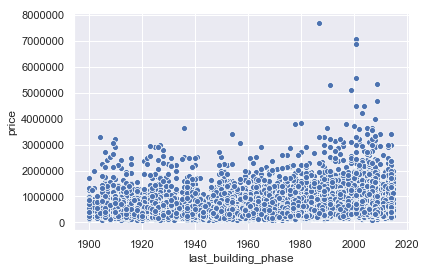

In [27]:
sns.scatterplot(x="last_building_phase", y="price", data=df2);

There is a small relationship between price and last_building_phase.

Lets plot some data

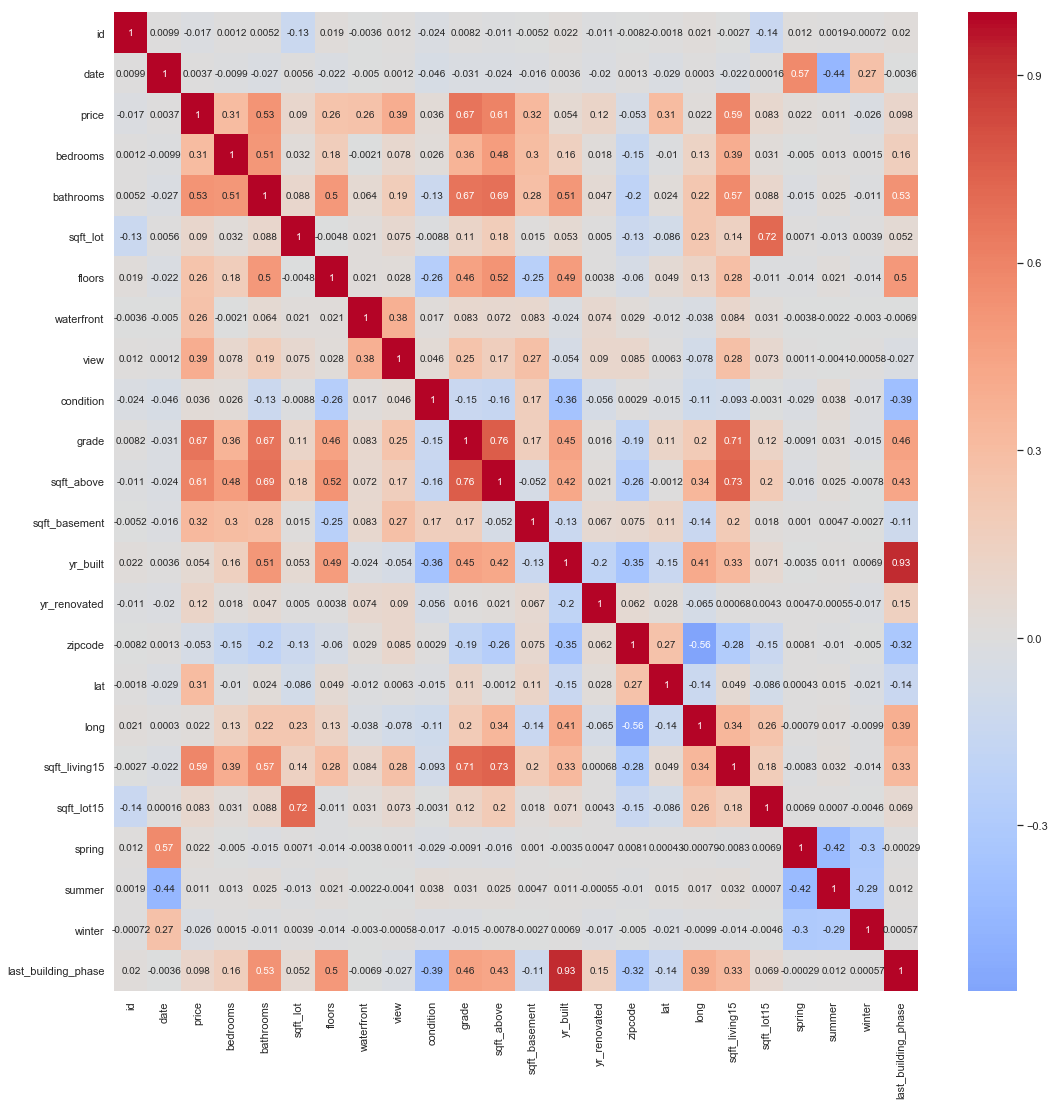

In [28]:
corr = df2.corr()
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(data=corr, center = 0, cmap="coolwarm", annot=True);

    There are variables that have a correlation with price:
        -bedrooms 0.31
        -bathrooms 0.53
        -sqft-lot 0.09
        -floors 0.26
        -waterfront 0.26
        -view 0.39
        -grade 0.67
        -sqft_above 0.31
        -sqft_basement 0.32
        -year_renovated 0.12
        -lat 0.31
        -sqft_living 0.59
        -last_building_phase 0.098

Lets plot the location and the price:

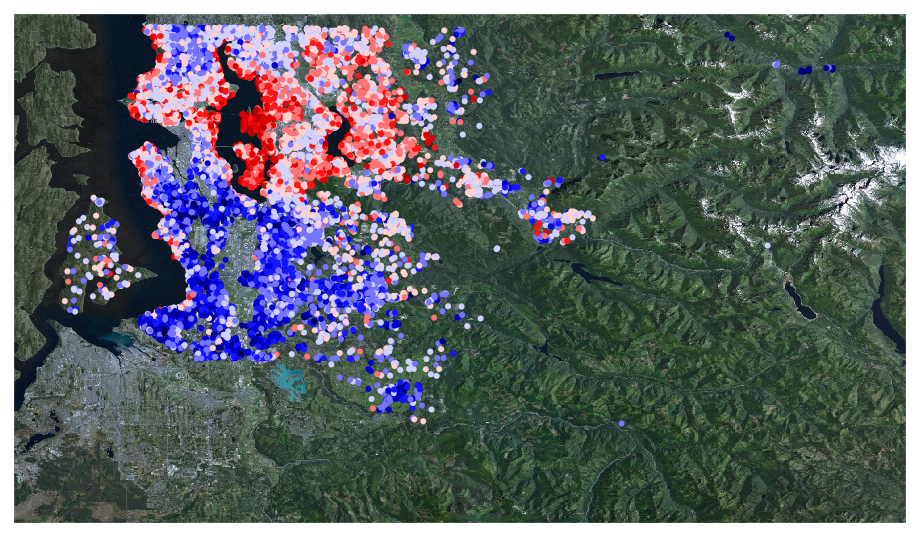

In [29]:
# Extract the data we're interested in
lat = df['lat'].values
lon = df['long'].values
bins = [0, 150000, 200000, 250000, 300000, 400000, 550000 ,750000, 1000000, 1500000, 2500000, 5000000, 10000000]
c = pd.cut(df['price'], bins, labels = range(12))
# 1. Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='merc', resolution='h', llcrnrlon = -122.6, llcrnrlat = 47, urcrnrlon = -121.2, urcrnrlat = 47.8,
            lon_0= -121.7,
            lat_0= 47.4,
            epsg=4269)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000)

# 2. scatter city data, with color reflecting population
# and size reflecting area
lons, lats = m(lon, lat)
m.scatter(lons, lats,zorder=1, linewidths=0.07, cmap = 'seismic', c = c)

plt.show()

We see that there is a correlation between location and price.

Let s take the squares of the plot and group our houses into them

In [30]:
lat = []
for i in (range(len(df))):
    if df['lat'][i] < 47.2:
        lat.append('lat_47.2')
    elif df['lat'][i] < 47.3:
        lat.append('lat_47.3')
    elif df['lat'][i] < 47.4:
        lat.append('lat_47.4')
    elif df['lat'][i] < 47.5:
        lat.append('lat_47.5')
    elif df['lat'][i] < 47.6:
        lat.append('lat_47.6')
    elif df['lat'][i] < 47.7:
        lat.append('lat_47.7')
    else:
        lat.append('lat_47.8')

In [31]:
long = []
for i in (range(len(df))):
    if df['long'][i] < -122.4:
        long.append('long_-122.4')
    elif df['long'][i] < -122.2:
        long.append('long_-122.2')
    elif df['long'][i] < -122:
        long.append('long_-122')
    elif df['long'][i] < -121.8:
        long.append('long_-121.8')
    elif df['long'][i] < -121.6:
        long.append('long_-121.6')
    elif df['long'][i] < -121.4:
        long.append('long_-121.4')
    else:
        long.append('long_-121.2')

In [32]:
lat_dummies = pd.get_dummies(lat, drop_first=True)
long_dummies = pd.get_dummies(long, drop_first=True)
long_dummies.head()

long_-121.4  long_-121.6  long_-121.8  long_-122  long_-122.2  long_-122.4
0            0            0            0          0            1            0
1            0            0            0          0            1            0
2            0            0            0          0            1            0
3            0            0            0          0            1            0
4            0            0            0          1            0            0

In [33]:
lat_long = pd.concat([lat_dummies, long_dummies], axis = 1)
lat_long.head()

lat_47.3  lat_47.4  lat_47.5  lat_47.6  lat_47.7  lat_47.8  long_-121.4  \
0         0         0         0         1         0         0            0   
1         0         0         0         0         0         1            0   
2         0         0         0         0         0         1            0   
3         0         0         0         1         0         0            0   
4         0         0         0         0         1         0            0   

   long_-121.6  long_-121.8  long_-122  long_-122.2  long_-122.4  
0            0            0          0            1            0  
1            0            0          0            1            0  
2            0            0          0            1            0  
3            0            0          0            1            0  
4            0            0          1            0            0

In [34]:
df3 = pd.concat([df2, lat_long], axis = 1)

## Model a linear Regression

In [35]:
X = df3[[ 'bedrooms', 'bathrooms',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat_47.8', 'lat_47.3', 'lat_47.4',
       'lat_47.5', 'lat_47.6', 'lat_47.7', 'long_-122.4', 'long_-121.4',
       'long_-121.6', 'long_-121.8', 'long_-122', 'long_-122.2']]
y = df3[['price']]
X = sms.add_constant(X)
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     2740.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:29:32   Log-Likelihood:            -2.9336e+05
No. Observations:               21597   AIC:                         5.868e+05
Df Residuals:                   21575   BIC:                         5.869e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.409e+05   6.26e+04     -7.039      0.000   -5.64e+05   -3.18e+05
bedrooms      -2.451e+04   1806.001    -13.570      0.000    -2.8e+04    -2.1e+04
bathrooms      1.454e+04   2936.901      4.952      0.000    8786.795    2.03e+04
sqft_lot          0.1172      0.034      3.485      0.000       0.051       0.183
floors        -7.445e+04   3338.798    -22.299      0.000    -8.1e+04   -6.79e+04
waterfront     6.575e+05   1.73e+04     38.000      0.000    6.24e+05    6.91e+05
view           5.832e+04   1999.164     29.171      0.000    5.44e+04    6.22e+04
grade          6.656e+04   1941.184     34.291      0.000    6.28e+04    7.04e+04
sqft_above      230.2617      3.150     73.103      0.000     224.088     236.436
sqft_basement   155.4998      4.087     38.044      0.000     147.488     163.511
lat_47.8       1.164e+05   2.17e+04      5.370      0.000    7.39e+04    1.59e+05
lat_47.3      -5.139e+04   2.25e+04     -2.281      0.023   -9.56e+04   -7235.817
lat_47.4      -4.009e+04   2.17e+04     -1.845      0.065   -8.27e+04    2489.904
lat_47.5       1.744e+04   2.17e+04      0.802      0.422   -2.52e+04    6.01e+04
lat_47.6       1.766e+05   2.16e+04      8.192      0.000    1.34e+05    2.19e+05
lat_47.7       3.217e+05   2.16e+04     14.869      0.000    2.79e+05    3.64e+05
long_-122.4    6.164e+04    5.9e+04      1.046      0.296   -5.39e+04    1.77e+05
long_-121.4   -1.014e+05   9.74e+04     -1.041      0.298   -2.92e+05    8.96e+04
long_-121.6    2.389e+04   5.95e+04      0.401      0.688   -9.28e+04    1.41e+05
long_-121.8   -9.844e+04   5.83e+04     -1.689      0.091   -2.13e+05    1.58e+04
long_-122     -2.936e+04   5.81e+04     -0.506      0.613   -1.43e+05    8.45e+04
long_-122.2     4.69e+04    5.8e+04      0.809      0.419   -6.68e+04    1.61e+05
==============================================================================
Omnibus:                    18904.678   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2171070.288
Skew:                           3.701   Prob(JB):                         0.00
Kurtosis:                      51.558   Cond. No.                     5.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared is 0.727 not bad at all.

## Improving our approach

We want to introduce dummy variables for the zipcode, because the zipcode is an integer but is actual a categorial variable.

First we plot the zipcode and try to get some insights

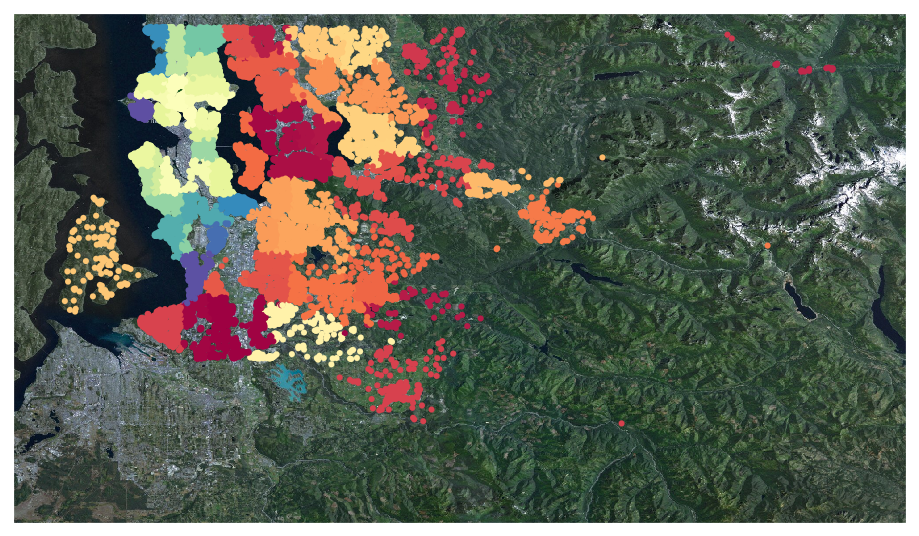

In [36]:
# Extract the data we're interested in
lat = df['lat'].values
lon = df['long'].values
# 1. Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='merc', resolution='h', llcrnrlon = -122.6, llcrnrlat = 47, urcrnrlon = -121.2, urcrnrlat = 47.8,
            lon_0= -121.7,
            lat_0= 47.4,
            epsg=4269)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000)

# 2. scatter city data, with color reflecting population
# and size reflecting area
lons, lats = m(lon, lat)
m.scatter(lons, lats,zorder=1, linewidths=0.1 , c = df['zipcode'].values, cmap = 'Spectral')

plt.show()

Seems to work quite good and should be more exact than just the dummies for longitude and latitude.

In [37]:
model = ols('price ~ C(zipcode) + bedrooms + bathrooms + sqft_lot + floors + waterfront + view + grade + sqft_above + sqft_basement + last_building_phase', data=df3).fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1119.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:29:55   Log-Likelihood:            -2.8978e+05
No. Observations:               21597   AIC:                         5.797e+05
Df Residuals:                   21517   BIC:                         5.804e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.056e+06   1.13e+05      9.346      0.000    8.34e+05    1.28e+06
C(zipcode)[T.98002]  3.497e+04   1.44e+04      2.429      0.015    6747.289    6.32e+04
C(zipcode)[T.98003] -1.719e+04    1.3e+04     -1.324      0.185   -4.26e+04    8253.120
C(zipcode)[T.98004]  7.868e+05   1.27e+04     62.025      0.000    7.62e+05    8.12e+05
C(zipcode)[T.98005]  3.104e+05   1.53e+04     20.244      0.000     2.8e+05    3.41e+05
C(zipcode)[T.98006]  2.772e+05   1.14e+04     24.239      0.000    2.55e+05       3e+05
C(zipcode)[T.98007]  2.513e+05   1.62e+04     15.488      0.000    2.19e+05    2.83e+05
C(zipcode)[T.98008]  2.538e+05    1.3e+04     19.529      0.000    2.28e+05    2.79e+05
C(zipcode)[T.98010]    7.7e+04   1.84e+04      4.174      0.000    4.08e+04    1.13e+05
C(zipcode)[T.98011]  1.217e+05   1.45e+04      8.398      0.000    9.33e+04     1.5e+05
C(zipcode)[T.98014]  9.283e+04   1.71e+04      5.419      0.000    5.93e+04    1.26e+05
C(zipcode)[T.98019]  8.653e+04   1.46e+04      5.913      0.000    5.78e+04    1.15e+05
C(zipcode)[T.98022] -5201.3953   1.38e+04     -0.376      0.707   -3.23e+04    2.19e+04
C(zipcode)[T.98023] -3.287e+04   1.13e+04     -2.917      0.004    -5.5e+04   -1.08e+04
C(zipcode)[T.98024]  1.521e+05   2.03e+04      7.498      0.000    1.12e+05    1.92e+05
C(zipcode)[T.98027]  1.708e+05   1.18e+04     14.465      0.000    1.48e+05    1.94e+05
C(zipcode)[T.98028]  1.195e+05   1.29e+04      9.237      0.000    9.42e+04    1.45e+05
C(zipcode)[T.98029]  2.105e+05   1.26e+04     16.720      0.000    1.86e+05    2.35e+05
C(zipcode)[T.98030]  4456.9119   1.33e+04      0.335      0.738   -2.16e+04    3.05e+04
C(zipcode)[T.98031]  1.854e+04   1.31e+04      1.419      0.156   -7068.667    4.42e+04
C(zipcode)[T.98032]  1.034e+04   1.69e+04      0.611      0.541   -2.28e+04    4.35e+04
C(zipcode)[T.98033]  3.705e+05   1.17e+04     31.779      0.000    3.48e+05    3.93e+05
C(zipcode)[T.98034]  2.012e+05   1.11e+04     18.173      0.000    1.79e+05    2.23e+05
C(zipcode)[T.98038]  3.168e+04   1.09e+04      2.900      0.004    1.03e+04    5.31e+04
C(zipcode)[T.98039]  1.332e+06   2.48e+04     53.757      0.000    1.28e+06    1.38e+06
C(zipcode)[T.98040]  5.297e+05   1.32e+04     40.275      0.000    5.04e+05    5.56e+05
C(zipcode)[T.98042]  1.124e+04    1.1e+04      1.017      0.309   -1.04e+04    3.29e+04
C(zipcode)[T.98045]  8.461e+04    1.4e+04      6.055      0.000    5.72e+04    1.12e+05
C(zipcode)[T.98052]  2.285e+05    1.1e+04     20.786      0.000    2.07e+05     2.5e+05
C(zipcode)[T.98053]  1.864e+05   1.19e+04     15.637      0.000    1.63e+05     2.1e+05
C(zipcode)[T.98055]  4.632e+04   1.31e+04      3.524      0.000    2.06e+04    7.21e+04
C(zipcode)[T.98056]  1.046e+05   1.18e+04      8.876      0.000    8.15e+04    1.28e+05
C(z

R-squared is 0.804 so we got an better result

So making dummies out of a categorial variable improved our model quite good. So lets take a look at other categorial variables.

Lets take a look at grade

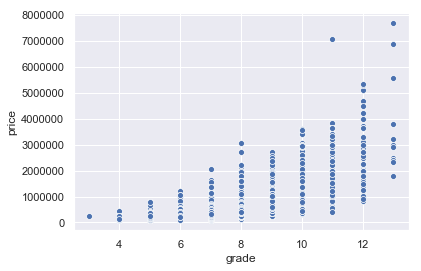

In [38]:
sns.scatterplot(x="grade", y="price", data=df3);

Lets generate dummy variables for grade

In [39]:
model = ols('price ~ C(grade) + C(zipcode) + bedrooms + bathrooms+ sqft_lot + floors + waterfront + view + sqft_above + sqft_basement + last_building_phase', data=df3).fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1191.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:29:56   Log-Likelihood:            -2.8827e+05
No. Observations:               21597   AIC:                         5.767e+05
Df Residuals:                   21508   BIC:                         5.774e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            9.453e+05   1.86e+05      5.088      0.000    5.81e+05    1.31e+06
C(grade)[T.4]       -1.677e+05   1.55e+05     -1.081      0.280   -4.72e+05    1.36e+05
C(grade)[T.5]       -2.039e+05   1.53e+05     -1.336      0.181   -5.03e+05    9.51e+04
C(grade)[T.6]       -2.024e+05   1.52e+05     -1.329      0.184   -5.01e+05    9.61e+04
C(grade)[T.7]       -2.007e+05   1.52e+05     -1.318      0.187   -4.99e+05    9.78e+04
C(grade)[T.8]       -1.772e+05   1.52e+05     -1.163      0.245   -4.76e+05    1.21e+05
C(grade)[T.9]       -1.031e+05   1.52e+05     -0.677      0.499   -4.02e+05    1.96e+05
C(grade)[T.10]        1.58e+04   1.52e+05      0.104      0.917   -2.83e+05    3.15e+05
C(grade)[T.11]       2.085e+05   1.53e+05      1.366      0.172   -9.08e+04    5.08e+05
C(grade)[T.12]       6.141e+05   1.54e+05      4.000      0.000    3.13e+05    9.15e+05
C(grade)[T.13]       1.712e+06   1.59e+05     10.785      0.000     1.4e+06    2.02e+06
C(zipcode)[T.98002]  1.377e+04   1.34e+04      1.024      0.306   -1.26e+04    4.01e+04
C(zipcode)[T.98003] -7461.9934   1.21e+04     -0.616      0.538   -3.12e+04    1.63e+04
C(zipcode)[T.98004]  7.787e+05   1.18e+04     65.755      0.000    7.55e+05    8.02e+05
C(zipcode)[T.98005]  3.198e+05   1.43e+04     22.328      0.000    2.92e+05    3.48e+05
C(zipcode)[T.98006]  2.635e+05   1.07e+04     24.660      0.000    2.43e+05    2.84e+05
C(zipcode)[T.98007]  2.622e+05   1.51e+04     17.319      0.000    2.33e+05    2.92e+05
C(zipcode)[T.98008]  2.678e+05   1.21e+04     22.082      0.000    2.44e+05    2.92e+05
C(zipcode)[T.98010]  6.984e+04   1.72e+04      4.056      0.000    3.61e+04    1.04e+05
C(zipcode)[T.98011]  1.372e+05   1.35e+04     10.148      0.000    1.11e+05    1.64e+05
C(zipcode)[T.98014]  8.581e+04    1.6e+04      5.362      0.000    5.44e+04    1.17e+05
C(zipcode)[T.98019]  9.398e+04   1.37e+04      6.882      0.000    6.72e+04    1.21e+05
C(zipcode)[T.98022] -2594.8172   1.29e+04     -0.201      0.841   -2.79e+04    2.27e+04
C(zipcode)[T.98023] -2.733e+04   1.05e+04     -2.598      0.009   -4.79e+04   -6708.254
C(zipcode)[T.98024]  1.518e+05   1.89e+04      8.013      0.000    1.15e+05    1.89e+05
C(zipcode)[T.98027]  1.732e+05    1.1e+04     15.701      0.000    1.52e+05    1.95e+05
C(zipcode)[T.98028]  1.335e+05   1.21e+04     11.054      0.000     1.1e+05    1.57e+05
C(zipcode)[T.98029]  2.239e+05   1.18e+04     19.034      0.000    2.01e+05    2.47e+05
C(zipcode)[T.98030]  7077.1394   1.24e+04      0.570      0.569   -1.73e+04    3.14e+04
C(zipcode)[T.98031]  2.154e+04   1.22e+04      1.767      0.077   -2357.074    4.54e+04
C(zipcode)[T.98032]  8549.9058   1.58e+04      0.541      0.588   -2.24e+04    3.95e+04
C(zipcode)[T.98033]   3.69e+05   1.09e+04     33.910      0.000    3.48e+05     3.9e+05
C(z

Seems like a good model so far. Lets try to drop some variables that have a low correlation with the price.
So we take a look at the heatmap again

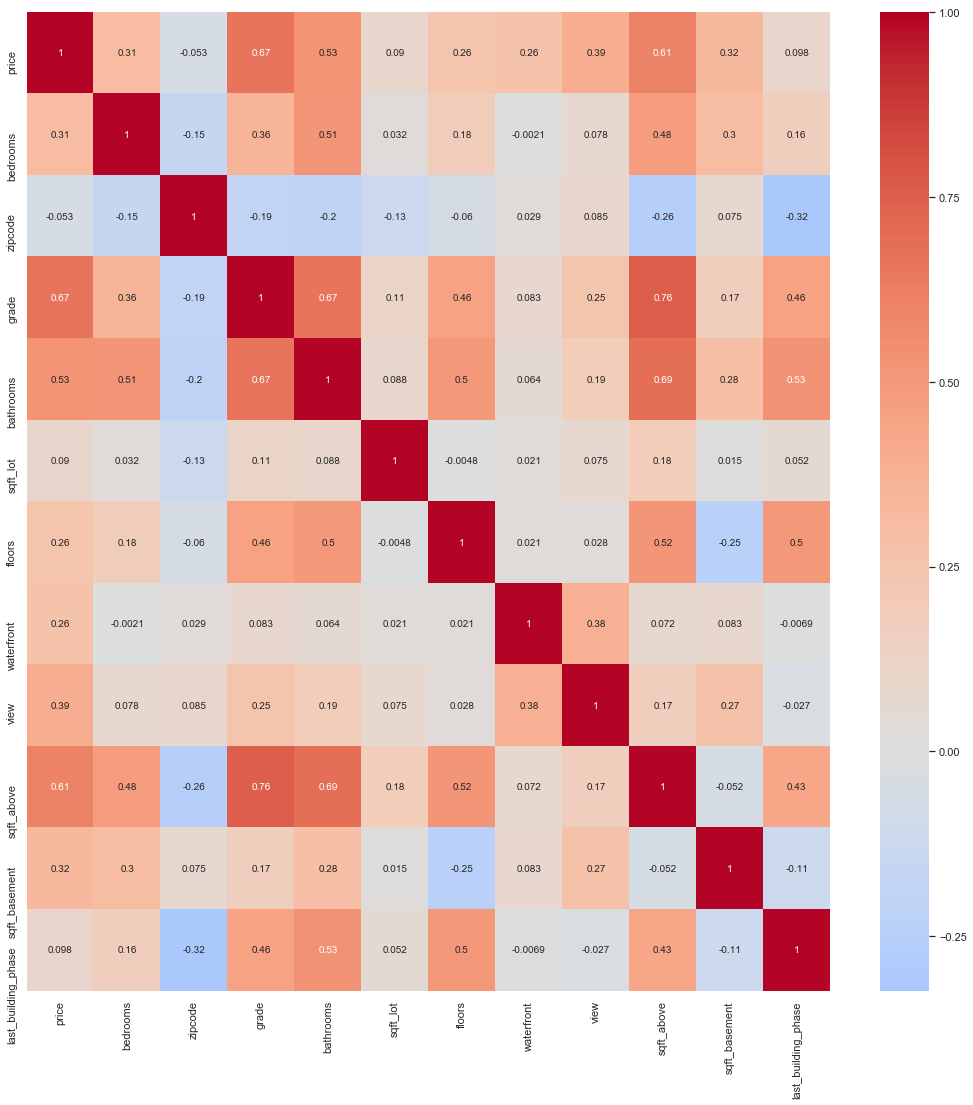

In [40]:
corr = df2[['price','bedrooms', 'zipcode','grade','bathrooms','sqft_lot','floors','waterfront','view','sqft_above','sqft_basement','last_building_phase']].corr()
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(data=corr, center = 0, cmap="coolwarm", annot=True);

    Lets try a model were we just keep variables with a correlation of 0.3 and above:
    -bedrooms
    -bathrooms
    -sqft_above
    -view
    -sqft_basement
    Also we want to keep our categorial variables 
    -zipcode 
    -grade

In [41]:
model = ols('price ~ C(grade) + C(zipcode) + bedrooms + bathrooms + sqft_above + view + sqft_basement', data=df3).fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1084.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:29:57   Log-Likelihood:            -2.8952e+05
No. Observations:               21597   AIC:                         5.792e+05
Df Residuals:                   21512   BIC:                         5.799e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.809e+05   1.61e+05      1.120      0.263   -1.36e+05    4.97e+05
C(grade)[T.4]       -1.818e+05   1.64e+05     -1.107      0.268   -5.04e+05     1.4e+05
C(grade)[T.5]       -2.017e+05   1.62e+05     -1.248      0.212   -5.18e+05    1.15e+05
C(grade)[T.6]       -2.117e+05   1.61e+05     -1.313      0.189   -5.28e+05    1.04e+05
C(grade)[T.7]       -2.192e+05   1.61e+05     -1.359      0.174   -5.35e+05    9.69e+04
C(grade)[T.8]       -2.099e+05   1.61e+05     -1.301      0.193   -5.26e+05    1.06e+05
C(grade)[T.9]       -1.436e+05   1.61e+05     -0.890      0.374    -4.6e+05    1.73e+05
C(grade)[T.10]       -1.91e+04   1.61e+05     -0.118      0.906   -3.36e+05    2.97e+05
C(grade)[T.11]       1.816e+05   1.62e+05      1.123      0.261   -1.35e+05    4.99e+05
C(grade)[T.12]       6.193e+05   1.63e+05      3.810      0.000    3.01e+05    9.38e+05
C(grade)[T.13]        1.64e+06   1.68e+05      9.760      0.000    1.31e+06    1.97e+06
C(zipcode)[T.98002]  1.559e+04   1.42e+04      1.095      0.273   -1.23e+04    4.35e+04
C(zipcode)[T.98003] -4557.8566   1.28e+04     -0.355      0.722   -2.97e+04    2.06e+04
C(zipcode)[T.98004]   7.85e+05   1.25e+04     62.754      0.000    7.61e+05     8.1e+05
C(zipcode)[T.98005]  3.386e+05   1.51e+04     22.389      0.000    3.09e+05    3.68e+05
C(zipcode)[T.98006]  2.609e+05   1.13e+04     23.099      0.000    2.39e+05    2.83e+05
C(zipcode)[T.98007]   2.74e+05    1.6e+04     17.109      0.000    2.43e+05    3.05e+05
C(zipcode)[T.98008]  2.916e+05   1.28e+04     22.759      0.000    2.66e+05    3.17e+05
C(zipcode)[T.98010]  7.431e+04   1.82e+04      4.081      0.000    3.86e+04     1.1e+05
C(zipcode)[T.98011]  1.412e+05   1.43e+04      9.863      0.000    1.13e+05    1.69e+05
C(zipcode)[T.98014]  9.516e+04   1.68e+04      5.665      0.000    6.22e+04    1.28e+05
C(zipcode)[T.98019]  9.333e+04   1.44e+04      6.462      0.000     6.5e+04    1.22e+05
C(zipcode)[T.98022] -2669.3218   1.36e+04     -0.197      0.844   -2.93e+04    2.39e+04
C(zipcode)[T.98023] -1.866e+04   1.11e+04     -1.675      0.094   -4.05e+04    3171.107
C(zipcode)[T.98024]  1.693e+05   1.99e+04      8.500      0.000     1.3e+05    2.08e+05
C(zipcode)[T.98027]  1.761e+05   1.17e+04     15.088      0.000    1.53e+05    1.99e+05
C(zipcode)[T.98028]  1.372e+05   1.28e+04     10.731      0.000    1.12e+05    1.62e+05
C(zipcode)[T.98029]    2.2e+05   1.24e+04     17.671      0.000    1.96e+05    2.44e+05
C(zipcode)[T.98030]  9121.9831   1.32e+04      0.694      0.488   -1.67e+04    3.49e+04
C(zipcode)[T.98031]  2.543e+04   1.29e+04      1.969      0.049     113.321    5.07e+04
C(zipcode)[T.98032]  1.303e+04   1.67e+04      0.779      0.436   -1.97e+04    4.58e+04
C(zipcode)[T.98033]  3.723e+05   1.15e+04     32.332      0.000     3.5e+05    3.95e+05
C(z

So we droped five variabels and we still got a pretty nice R-squared value of 0.809

## Feature engineering

Lets try some K-Fold cross validation

In [42]:
df4 = df2.copy()
y = df2.price.values # define the target variable (dependent variable) as y
df4.drop('price', axis=1, inplace=True)


In [43]:
df4.head()

id  date  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0  7129300520  2014         3       1.00      5650     1.0         0.0   0.0   
1  6414100192  2014         3       2.25      7242     2.0         0.0   0.0   
2  5631500400  2015         2       1.00     10000     1.0         0.0   0.0   
3  2487200875  2014         4       3.00      5000     1.0         0.0   0.0   
4  1954400510  2015         3       2.00      8080     1.0         0.0   0.0   

   condition  grade         ...           yr_renovated  zipcode      lat  \
0          3      7         ...                    0.0    98178  47.5112   
1          3      7         ...                 1991.0    98125  47.7210   
2          3      6         ...                    0.0    98028  47.7379   
3          5      7         ...                    0.0    98136  47.5208   
4          3      8         ...                    0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15  spring  summer  winter  \
0 -122.257           1340        5650       0       0       0   
1 -122.319           1690        7639       0       0       1   
2 -122.233           2720        8062       0       0       1   
3 -122.393           1360        5000       0       0       1   
4 -122.045           1800        7503       0       0       1   

   last_building_phase  
0               1955.0  
1               1991.0  
2               1933.0  
3               1965.0  
4               1987.0  

[5 rows x 23 columns]

In [44]:
result = []
for i in range(10):
    # create training and testing vars
    X_train, X_test, y_train, y_test = train_test_split(df4, y, test_size=0.2)

    # fit a model
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    result.append(model.score(X_test, y_test))

print('Score: ' + str(np.mean(result)))

Score: 0.6976503487157188


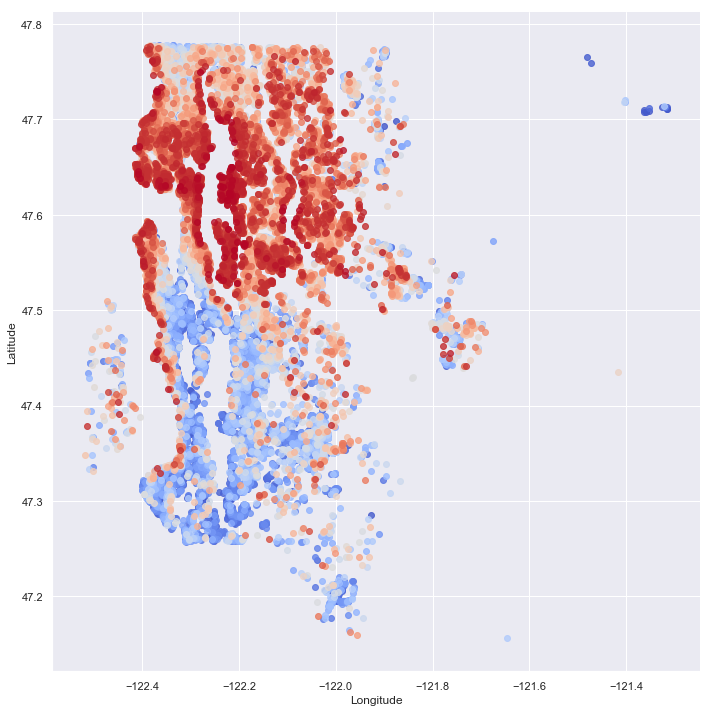

In [45]:
sns.lmplot(y="lat", x="long", hue="price", data=df, fit_reg=False, height = 10, legend = False, palette = "coolwarm")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

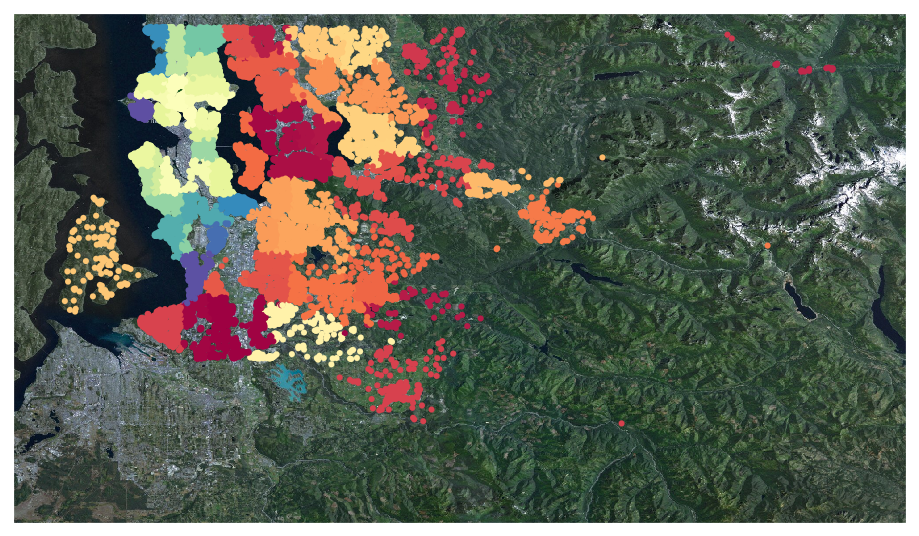

In [46]:

# Extract the data we're interested in
lat = df['lat'].values
lon = df['long'].values
# 1. Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='merc', resolution='h', llcrnrlon = -122.6, llcrnrlat = 47, urcrnrlon = -121.2, urcrnrlat = 47.8,
            lon_0= -121.7,
            lat_0= 47.4,
            epsg=4269)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000)

# 2. scatter city data, with color reflecting population
# and size reflecting area
lons, lats = m(lon, lat)
m.scatter(lons, lats,zorder=1, linewidths=0.1 , c = df['zipcode'].values, cmap = 'Spectral')

plt.show()

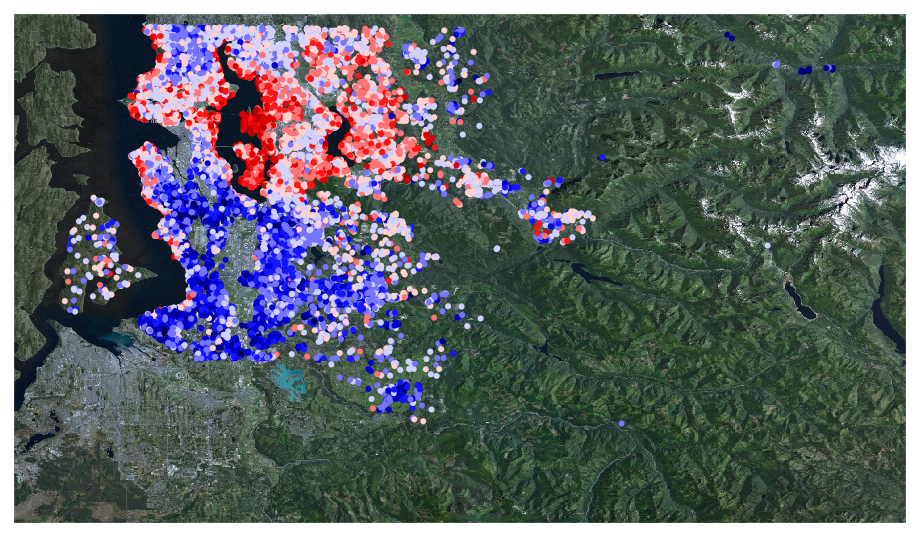

In [49]:
# Extract the data we're interested in
lat = df['lat'].values
lon = df['long'].values
bins = [0, 150000, 200000, 250000, 300000, 400000, 550000 ,750000, 1000000, 1500000, 2500000, 5000000, 10000000]
c = pd.cut(df['price'], bins, labels = range(12))
# 1. Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='merc', resolution='h', llcrnrlon = -122.6, llcrnrlat = 47, urcrnrlon = -121.2, urcrnrlat = 47.8,
            lon_0= -121.7,
            lat_0= 47.4,
            epsg=4269)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000)

# 2. scatter city data, with color reflecting population
# and size reflecting area
lons, lats = m(lon, lat)
m.scatter(lons, lats,zorder=1, linewidths=0.07, cmap = 'seismic', c = c)

In [52]:
model = ols('price ~ C(grade) + C(zipcode) + bedrooms + bathrooms+ sqft_lot + floors + waterfront + C(view) + sqft_above + sqft_basement', data=df3).fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1171.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:34:09   Log-Likelihood:            -2.8822e+05
No. Observations:               21597   AIC:                         5.766e+05
Df Residuals:                   21506   BIC:                         5.774e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.038e+05   1.52e+05      1.340      0.180   -9.44e+04    5.02e+05
C(grade)[T.4]       -1.735e+05   1.55e+05     -1.121      0.262   -4.77e+05     1.3e+05
C(grade)[T.5]       -2.101e+05   1.52e+05     -1.380      0.168   -5.08e+05    8.83e+04
C(grade)[T.6]       -2.133e+05   1.52e+05     -1.404      0.160   -5.11e+05    8.45e+04
C(grade)[T.7]       -2.168e+05   1.52e+05     -1.427      0.154   -5.15e+05     8.1e+04
C(grade)[T.8]       -1.963e+05   1.52e+05     -1.292      0.196   -4.94e+05    1.02e+05
C(grade)[T.9]       -1.254e+05   1.52e+05     -0.825      0.409   -4.23e+05    1.73e+05
C(grade)[T.10]      -7730.6668   1.52e+05     -0.051      0.959   -3.06e+05     2.9e+05
C(grade)[T.11]       1.848e+05   1.52e+05      1.213      0.225   -1.14e+05    4.83e+05
C(grade)[T.12]       5.813e+05   1.53e+05      3.797      0.000    2.81e+05    8.81e+05
C(grade)[T.13]       1.675e+06   1.58e+05     10.583      0.000    1.36e+06    1.99e+06
C(zipcode)[T.98002]  1.561e+04   1.34e+04      1.164      0.244   -1.07e+04    4.19e+04
C(zipcode)[T.98003] -4043.2219   1.21e+04     -0.334      0.738   -2.77e+04    1.97e+04
C(zipcode)[T.98004]  7.817e+05   1.18e+04     66.229      0.000    7.59e+05    8.05e+05
C(zipcode)[T.98005]  3.249e+05   1.43e+04     22.778      0.000    2.97e+05    3.53e+05
C(zipcode)[T.98006]  2.669e+05   1.06e+04     25.068      0.000    2.46e+05    2.88e+05
C(zipcode)[T.98007]  2.678e+05   1.51e+04     17.754      0.000    2.38e+05    2.97e+05
C(zipcode)[T.98008]   2.72e+05   1.21e+04     22.505      0.000    2.48e+05    2.96e+05
C(zipcode)[T.98010]  6.825e+04   1.72e+04      3.973      0.000    3.46e+04    1.02e+05
C(zipcode)[T.98011]  1.385e+05   1.35e+04     10.272      0.000    1.12e+05    1.65e+05
C(zipcode)[T.98014]  8.633e+04    1.6e+04      5.407      0.000     5.5e+04    1.18e+05
C(zipcode)[T.98019]  9.246e+04   1.36e+04      6.787      0.000    6.58e+04    1.19e+05
C(zipcode)[T.98022]  2249.4946   1.29e+04      0.174      0.862    -2.3e+04    2.75e+04
C(zipcode)[T.98023] -2.625e+04   1.05e+04     -2.501      0.012   -4.68e+04   -5680.083
C(zipcode)[T.98024]  1.549e+05   1.89e+04      8.200      0.000    1.18e+05    1.92e+05
C(zipcode)[T.98027]  1.756e+05    1.1e+04     15.963      0.000    1.54e+05    1.97e+05
C(zipcode)[T.98028]  1.349e+05    1.2e+04     11.200      0.000    1.11e+05    1.59e+05
C(zipcode)[T.98029]  2.269e+05   1.17e+04     19.338      0.000    2.04e+05     2.5e+05
C(zipcode)[T.98030]  7266.8134   1.24e+04      0.587      0.557    -1.7e+04    3.15e+04
C(zipcode)[T.98031]   2.24e+04   1.22e+04      1.841      0.066   -1444.219    4.62e+04
C(zipcode)[T.98032]  1.172e+04   1.57e+04      0.744      0.457   -1.92e+04    4.26e+04
C(zipcode)[T.98033]  3.728e+05   1.09e+04     34.348      0.000    3.52e+05    3.94e+05
C(z

In [ ]:
sns.scatterplot(x="sqft_above", y="price", data=df2);

In [ ]:
sns.scatterplot(x="sqft_basement", y="price", data=df2);

In [ ]:
sns.scatterplot(x="grade", y="price", data=df2);

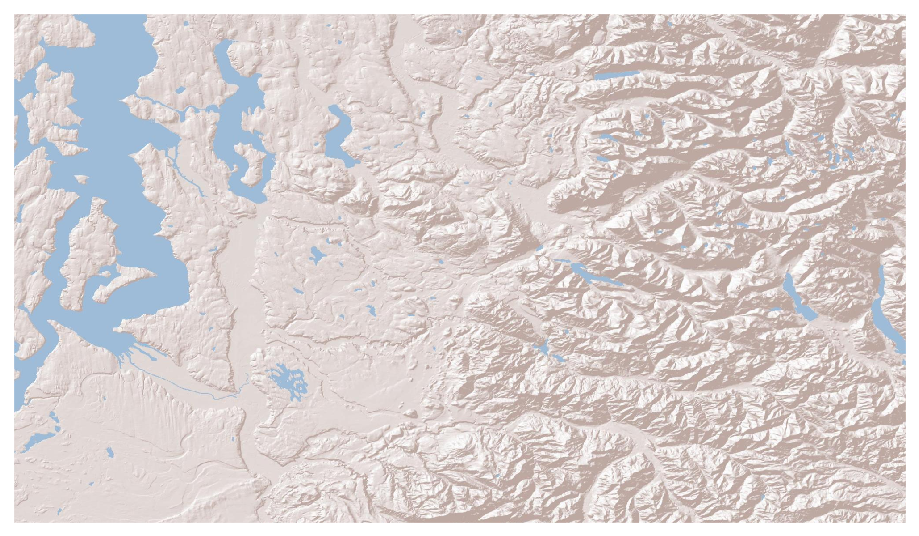

In [53]:
# Extract the data we're interested in
lat = df['lat'].values
lon = df['long'].values
bins = [0, 150000, 200000, 250000, 300000, 400000, 550000 ,750000, 1000000, 1500000, 2500000, 5000000, 10000000]
c = pd.cut(df['price'], bins, labels = range(12))
# 1. Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='merc', resolution='h', llcrnrlon = -122.6, llcrnrlat = 47, urcrnrlon = -121.2, urcrnrlat = 47.8,
            lon_0= -121.7,
            lat_0= 47.4,
            epsg=4269)
m.arcgisimage(service='World_Shaded_Relief', xpixels = 2000)

# 2. scatter city data, with color reflecting population
# and size reflecting area
#lons, lats = m(lon, lat)
#m.scatter(lons, lats,zorder=1, linewidths=0.07, cmap = 'seismic', c = c)